In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

import glob
import anndata as ad
import collections
from tqdm import tqdm
os.chdir('/rd2/user/xiacr/sle/')

In [5]:
results_file = 'output_file/scvelo/navie_B/navie_B_scvelo_out.h5ad' 
naiveB_index = pd.read_csv('./scripts/scvelo/naive_B/navieB_seurat_meta.csv')

In [6]:
naiveB_index['1'], naiveB_index['2'] = naiveB_index['Row.names'].str.split('_', 1).str
naiveB_index['barcode'] = naiveB_index['1']+ '_' + naiveB_index['orig.ident']

In [7]:
naiveB_index

Unnamed: 0              Row.names orig.ident  nCount_RNA  nFeature_RNA  \
0               1  AAACCTGAGCTTCGCG-1_14        WYY        5124          1639   
1               2  AAACCTGAGGCCGAAT-1_15         XH        1100           564   
2               3   AAACCTGAGGGCATGT-1_9        QJY        1093           551   
3               4   AAACCTGAGTATCTCG-1_6        LGY        1359           681   
4               5  AAACCTGAGTCAAGCG-1_12        WYF        1520           795   
...           ...                    ...        ...         ...           ...   
14815       14816   TTTGTCAGTGGTCCGT-1_6        LGY        3636          1376   
14816       14817   TTTGTCAGTTGCGTTA-1_5        HXX        4364          1824   
14817       14818   TTTGTCATCACGATGT-1_2        GZR        5939          2136   
14818       14819   TTTGTCATCCAAGCCG-1_7         LL         934           400   
14819       14820  TTTGTCATCTGGTGTA-1_14        WYY        5039          1795   

       percent_mito  percent_ribo   S.Score  G2M.Score Phase  ...      pair  \
0          1.190476     42.681499 -0.068316  -0.059301    G1  ...  unpaired   
1          2.454545     36.000000 -0.000828  -0.033746    G1  ...   XH_pair   
2          3.751144     36.688015  0.006266  -0.036086     S  ...  unpaired   
3          2.060338     35.099338 -0.010028   0.037236   G2M  ...  unpaired   
4          2.894737     25.592105  0.021271   0.070599   G2M  ...  WYF_pair   
...             ...           ...       ...        ...   ...  ...       ...   
14815      1.925193     33.718372 -0.026924  -0.024440    G1  ...  unpaired   
14816      0.824931     27.199817 -0.029426   0.029203   G2M  ...  unpaired   
14817      1.835326     28.136050 -0.074965   0.003587   G2M  ...  unpaired   
14818      0.749465     46.466809  0.025001  -0.017076     S  ...   LL_pair   
14819      2.123437     34.292518 -0.063457  -0.035063    G1  ...  unpaired   

       cell_type  RNA_snn_res.0.8         subtype disease    UMAP_1    UMAP_2  \
0          Bcell                2         B.naive     SLE -0.354000 -3.190493   
1          Bcell                5  B.IFN-response     SLE -1.799064  3.921798   
2          Bcell                1         B.naive      HC  2.249992 -1.374995   
3          Bcell                1         B.naive     SLE  3.745641 -1.260194   
4          Bcell                3         B.naive     SLE -0.979233  2.359425   
...          ...              ...             ...     ...       ...       ...   
14815      Bcell                1         B.naive     SLE  2.164843 -2.408607   
14816      Bcell                6         B.naive     SLE  0.374533 -1.135989   
14817      Bcell                3         B.naive     SLE -2.420736  0.485116   
14818      Bcell                1         B.naive     SLE  2.023398 -3.312308   
14819      Bcell                2         B.naive     SLE -2.070948 -0.167798   

                        1   2                 barcode  
0      AAACCTGAGCTTCGCG-1  14  AAACCTGAGCTTCGCG-1_WYY  
1      AAACCTGAGGCCGAAT-1  15   AAACCTGAGGCCGAAT-1_XH  
2      AAACCTGAGGGCATGT-1   9  AAACCTGAGGGCATGT-1_QJY  
3      AAACCTGAGTATCTCG-1   6  AAACCTGAGTATCTCG-1_LGY  
4      AAACCTGAGTCAAGCG-1  12  AAACCTGAGTCAAGCG-1_WYF  
...                   ...  ..                     ...  
14815  TTTGTCAGTGGTCCGT-1   6  TTTGTCAGTGGTCCGT-1_LGY  
14816  TTTGTCAGTTGCGTTA-1   5  TTTGTCAGTTGCGTTA-1_HXX  
14817  TTTGTCATCACGATGT-1   2  TTTGTCATCACGATGT-1_GZR  
14818  TTTGTCATCCAAGCCG-1   7   TTTGTCATCCAAGCCG-1_LL  
14819  TTTGTCATCTGGTGTA-1  14  TTTGTCATCTGGTGTA-1_WYY  

[14820 rows x 25 columns]

In [8]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

# Load the Data

In [63]:
# Too slot please use parallel
# file_list = glob.glob('data/loom_velocity/*')
# adatas = []
# for file in file_list:
#     tmp_adata = sc.read_loom(file)
#     tmp_adata.var_names_make_unique()
#     tmp_adata.obs['sample'] = file.split('/')[2].split('_')[0]
#     adatas.append(tmp_adata)
# adata = adatas[0].concatenate(adatas[1:])
# adata.obs['sample'].value_counts()
# del tmp_adata
# del adatas

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


KeyboardInterrupt: 

In [2]:
import multiprocessing
adatas = []
def read_loom(file):
    tmp_adata = sc.read_loom(file)
    tmp_adata.var_names_make_unique()
    tmp_adata.obs['sample'] = file.split('/')[2].split('_')[1].split('.')[0]
    # adatas.append(tmp_adata)
    return tmp_adata
file_list = glob.glob('data/loom_velocity/*')

p = multiprocessing.Pool(24)
adatas = p.map(read_loom, file_list)
p.close()
p.join()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

In [3]:
adata = adatas[0].concatenate(adatas[1:])
adata.obs['sample'].value_counts()
del adatas

In [4]:
adata.obs['1'], adata.obs['2'] = adata.obs_names.str.split(':', 1).str
adata.obs['3'], adata.obs['4'] = adata.obs['2'].str.split('x-', 1).str
adata.obs['5'], adata.obs['6'] = adata.obs['1'].str.split('_', 1).str

In [5]:
adata.obs['6'].replace('zpp_count','ZPP',inplace=True)
adata.obs['6'].replace('hxr_count','HXR',inplace=True)
adata.obs['6'].replace('wyf_count','WYF',inplace=True)
adata.obs['6'].replace('GW_SLE','GW',inplace=True)
adata.obs['6'].replace('zmy1','ZMY1',inplace=True)
adata.obs['6'].replace('zh','ZH',inplace=True)
adata.obs['6'].replace('zs_count','ZS',inplace=True)
adata.obs['6'].replace('wh1','WH1',inplace=True)

In [6]:
adata.obs['barcode'] = adata.obs['3'] + '-1_'+ adata.obs['6']
adata.obs['batch'] = adata.obs['6'].astype('category')

In [14]:
adata.obs

Clusters         _X         _Y sample batch  \
CellID                                                                        
count_WH2:AAACGGGTCAACGGGAx-0         11  35.432301 -23.096350    WH2   WH2   
count_WH2:AAACCTGGTAGGACACx-0          2 -31.303436  16.219198    WH2   WH2   
count_WH2:AAACCTGCAGCTGCTGx-0          1  -5.604272  18.444117    WH2   WH2   
count_WH2:AAACGGGCAGACAAGCx-0          8  18.075447 -19.442060    WH2   WH2   
count_WH2:AAACGGGGTCGCTTCTx-0          8  20.319754 -18.395624    WH2   WH2   
...                                  ...        ...        ...    ...   ...   
count_LGY:TTTGGTTCACAACGTTx-15         5  13.824735 -17.506483    LGY   LGY   
count_LGY:TTTGTCAAGAACAATCx-15         2  -8.199017 -31.202829    LGY   LGY   
count_LGY:TTTGGTTCATACGCTAx-15         8  -6.719591  -5.246661    LGY   LGY   
count_LGY:TTTGTCATCCTTCAATx-15         1 -25.594046  18.352251    LGY   LGY   
count_LGY:TTTGTCAGTCGAAAGCx-15         0  34.974174   2.263466    LGY   LGY   

                                        1                     2  \
CellID                                                            
count_WH2:AAACGGGTCAACGGGAx-0   count_WH2   AAACGGGTCAACGGGAx-0   
count_WH2:AAACCTGGTAGGACACx-0   count_WH2   AAACCTGGTAGGACACx-0   
count_WH2:AAACCTGCAGCTGCTGx-0   count_WH2   AAACCTGCAGCTGCTGx-0   
count_WH2:AAACGGGCAGACAAGCx-0   count_WH2   AAACGGGCAGACAAGCx-0   
count_WH2:AAACGGGGTCGCTTCTx-0   count_WH2   AAACGGGGTCGCTTCTx-0   
...                                   ...                   ...   
count_LGY:TTTGGTTCACAACGTTx-15  count_LGY  TTTGGTTCACAACGTTx-15   
count_LGY:TTTGTCAAGAACAATCx-15  count_LGY  TTTGTCAAGAACAATCx-15   
count_LGY:TTTGGTTCATACGCTAx-15  count_LGY  TTTGGTTCATACGCTAx-15   
count_LGY:TTTGTCATCCTTCAATx-15  count_LGY  TTTGTCATCCTTCAATx-15   
count_LGY:TTTGTCAGTCGAAAGCx-15  count_LGY  TTTGTCAGTCGAAAGCx-15   

                                               3   4      5    6  \
CellID                                                             
count_WH2:AAACGGGTCAACGGGAx-0   AAACGGGTCAACGGGA   0  count  WH2   
count_WH2:AAACCTGGTAGGACACx-0   AAACCTGGTAGGACAC   0  count  WH2   
count_WH2:AAACCTGCAGCTGCTGx-0   AAACCTGCAGCTGCTG   0  count  WH2   
count_WH2:AAACGGGCAGACAAGCx-0   AAACGGGCAGACAAGC   0  count  WH2   
count_WH2:AAACGGGGTCGCTTCTx-0   AAACGGGGTCGCTTCT   0  count  WH2   
...                                          ...  ..    ...  ...   
count_LGY:TTTGGTTCACAACGTTx-15  TTTGGTTCACAACGTT  15  count  LGY   
count_LGY:TTTGTCAAGAACAATCx-15  TTTGTCAAGAACAATC  15  count  LGY   
count_LGY:TTTGGTTCATACGCTAx-15  TTTGGTTCATACGCTA  15  count  LGY   
count_LGY:TTTGTCATCCTTCAATx-15  TTTGTCATCCTTCAAT  15  count  LGY   
count_LGY:TTTGTCAGTCGAAAGCx-15  TTTGTCAGTCGAAAGC  15  count  LGY   

                                               barcode  
CellID                                                  
count_WH2:AAACGGGTCAACGGGAx-0   AAACGGGTCAACGGGA-1_WH2  
count_WH2:AAACCTGGTAGGACACx-0   AAACCTGGTAGGACAC-1_WH2  
count_WH2:AAACCTGCAGCTGCTGx-0   AAACCTGCAGCTGCTG-1_WH2  
count_WH2:AAACGGGCAGACAAGCx-0   AAACGGGCAGACAAGC-1_WH2  
count_WH2:AAACGGGGTCGCTTCTx-0   AAACGGGGTCGCTTCT-1_WH2  
...                                                ...  
count_LGY:TTTGGTTCACAACGTTx-15  TTTGGTTCACAACGTT-1_LGY  
count_LGY:TTTGTCAAGAACAATCx-15  TTTGTCAAGAACAATC-1_LGY  
count_LGY:TTTGGTTCATACGCTAx-15  TTTGGTTCATACGCTA-1_LGY  
count_LGY:TTTGTCATCCTTCAATx-15  TTTGTCATCCTTCAAT-1_LGY  
count_LGY:TTTGTCAGTCGAAAGCx-15  TTTGTCAGTCGAAAGC-1_LGY  

[224870 rows x 12 columns]

In [15]:
adata.obs['batch'].value_counts()

WH2     23628
ZPP     18729
LGY     18268
HXX     16750
HXR     16715
XYY2    15127
WYF     14247
LL2     14138
GW      13931
ZMY1    12596
HXR2    12060
ZH      11876
WYF2    11551
ZS      11131
ZPP2     9501
WH1      4622
Name: batch, dtype: int64

In [7]:
adata.write_h5ad('./output_file/scvelo/all_pbmc_for_scvelo.adata')

... storing 'sample' as categorical
... storing '1' as categorical
... storing '3' as categorical
... storing '4' as categorical
... storing '5' as categorical
... storing '6' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


# naive B cell

In [123]:
adata_naiveB = adata[adata.obs['barcode'].isin(naiveB_index['barcode'] )]
adata_naiveB

View of AnnData object with n_obs × n_vars = 12045 × 36601
    obs: 'Clusters', '_X', '_Y', 'sample', 'batch', '1', '2', '3', '4', '5', '6', 'barcode'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [124]:
# merge the seurat meta
adata_naiveB.obs = adata_naiveB.obs.rename_axis("CellID").reset_index()
adata_naiveB.obs = adata_naiveB.obs.merge(naiveB_index, how='left', left_on='barcode', right_on='barcode')
adata_naiveB.obs = adata_naiveB.obs.set_index('CellID')

In [125]:
adata_naiveB.obs

Clusters         _X         _Y sample batch  \
CellID                                                                        
count_HXX:AAACCTGTCGGACAAGx-1         17 -13.556776  -0.809489    HXX   HXX   
count_HXX:AAAGATGCAAGTAATGx-1          0   0.455002   7.534888    HXX   HXX   
count_HXX:AAAGATGTCAGCACATx-1          5  36.528843 -17.670918    HXX   HXX   
count_HXX:AAACCTGGTTCTGGTAx-1          3  25.031630   5.751987    HXX   HXX   
count_HXX:AAACCTGTCTGCCAGGx-1          9 -37.191414  -1.148429    HXX   HXX   
...                                  ...        ...        ...    ...   ...   
count_LGY:TTTGGTTGTTAGTGGGx-15         0  39.025223 -18.937588    LGY   LGY   
count_LGY:TTTGGTTCAGGTGCCTx-15        10  -7.811321  24.813364    LGY   LGY   
count_LGY:TTTGGTTCAAGTCTACx-15         2  -7.884353 -24.703754    LGY   LGY   
count_LGY:TTTGGTTCAAGGACTGx-15         0  25.106070  -6.642591    LGY   LGY   
count_LGY:TTTGTCAAGAACAATCx-15         2  -8.199017 -31.202829    LGY   LGY   

                                      1_x                   2_x  \
CellID                                                            
count_HXX:AAACCTGTCGGACAAGx-1   count_HXX   AAACCTGTCGGACAAGx-1   
count_HXX:AAAGATGCAAGTAATGx-1   count_HXX   AAAGATGCAAGTAATGx-1   
count_HXX:AAAGATGTCAGCACATx-1   count_HXX   AAAGATGTCAGCACATx-1   
count_HXX:AAACCTGGTTCTGGTAx-1   count_HXX   AAACCTGGTTCTGGTAx-1   
count_HXX:AAACCTGTCTGCCAGGx-1   count_HXX   AAACCTGTCTGCCAGGx-1   
...                                   ...                   ...   
count_LGY:TTTGGTTGTTAGTGGGx-15  count_LGY  TTTGGTTGTTAGTGGGx-15   
count_LGY:TTTGGTTCAGGTGCCTx-15  count_LGY  TTTGGTTCAGGTGCCTx-15   
count_LGY:TTTGGTTCAAGTCTACx-15  count_LGY  TTTGGTTCAAGTCTACx-15   
count_LGY:TTTGGTTCAAGGACTGx-15  count_LGY  TTTGGTTCAAGGACTGx-15   
count_LGY:TTTGTCAAGAACAATCx-15  count_LGY  TTTGTCAAGAACAATCx-15   

                                               3   4      5  ...  treatment  \
CellID                                                       ...              
count_HXX:AAACCTGTCGGACAAGx-1   AAACCTGTCGGACAAG   1  count  ...  untreated   
count_HXX:AAAGATGCAAGTAATGx-1   AAAGATGCAAGTAATG   1  count  ...  untreated   
count_HXX:AAAGATGTCAGCACATx-1   AAAGATGTCAGCACAT   1  count  ...  untreated   
count_HXX:AAACCTGGTTCTGGTAx-1   AAACCTGGTTCTGGTA   1  count  ...  untreated   
count_HXX:AAACCTGTCTGCCAGGx-1   AAACCTGTCTGCCAGG   1  count  ...  untreated   
...                                          ...  ..    ...  ...        ...   
count_LGY:TTTGGTTGTTAGTGGGx-15  TTTGGTTGTTAGTGGG  15  count  ...  untreated   
count_LGY:TTTGGTTCAGGTGCCTx-15  TTTGGTTCAGGTGCCT  15  count  ...  untreated   
count_LGY:TTTGGTTCAAGTCTACx-15  TTTGGTTCAAGTCTAC  15  count  ...  untreated   
count_LGY:TTTGGTTCAAGGACTGx-15  TTTGGTTCAAGGACTG  15  count  ...  untreated   
count_LGY:TTTGTCAAGAACAATCx-15  TTTGTCAAGAACAATC  15  count  ...  untreated   

                                    pair  cell_type RNA_snn_res.0.8  \
CellID                                                                
count_HXX:AAACCTGTCGGACAAGx-1   unpaired      Bcell               4   
count_HXX:AAAGATGCAAGTAATGx-1   unpaired      Bcell               0   
count_HXX:AAAGATGTCAGCACATx-1   unpaired      Bcell               1   
count_HXX:AAACCTGGTTCTGGTAx-1   unpaired      Bcell               2   
count_HXX:AAACCTGTCTGCCAGGx-1   unpaired      Bcell               4   
...                                  ...        ...             ...   
count_LGY:TTTGGTTGTTAGTGGGx-15  unpaired      Bcell               3   
count_LGY:TTTGGTTCAGGTGCCTx-15  unpaired      Bcell               4   
count_LGY:TTTGGTTCAAGTCTACx-15  unpaired      Bcell               4   
count_LGY:TTTGGTTCAAGGACTGx-15  unpaired      Bcell               0   
count_LGY:TTTGTCAAGAACAATCx-15  unpaired      Bcell               0   

                                     subtype  disease    UMAP_1    UMAP_2  \
CellID                                                                      
count_HXX:AAACCTGTCGGACAAG

In [126]:
adata_naiveB.obs['subtype'].value_counts()

B.naive           8942
B.transition      1830
B.IFN-response    1273
Name: subtype, dtype: int64

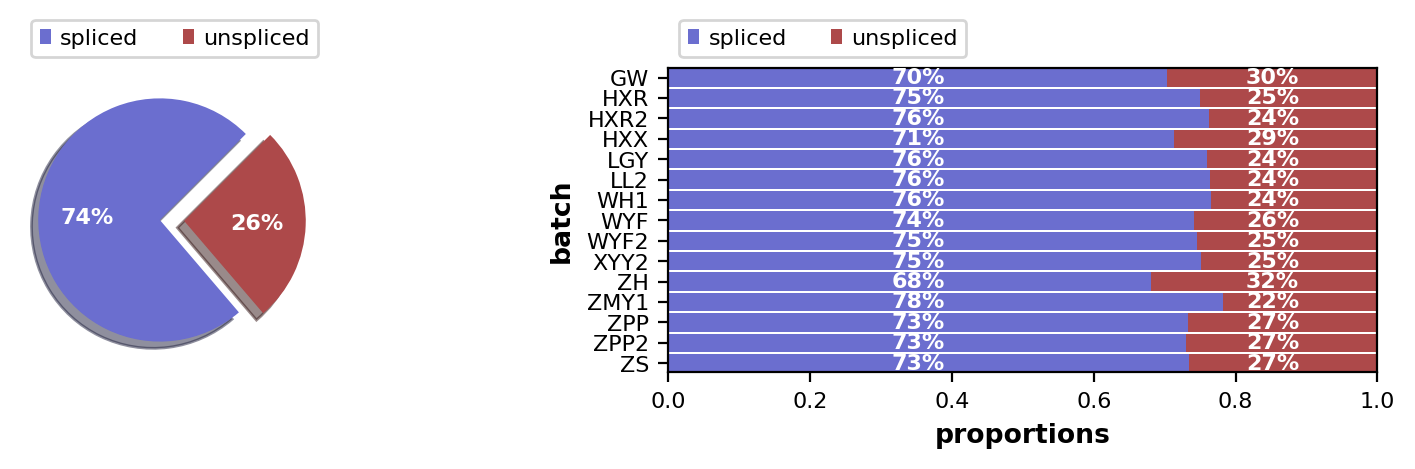

In [127]:
scv.pl.proportions(adata_naiveB, groupby='batch')

### Scanpy and scVelo

In [128]:
scv.pp.filter_genes(adata_naiveB, min_shared_counts=20)
scv.pp.normalize_per_cell(adata_naiveB)
scv.pp.filter_genes_dispersion(adata_naiveB, n_top_genes=2000)
scv.pp.log1p(adata_naiveB)

Filtered out 30296 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [129]:
scv.pp.filter_and_normalize(adata_naiveB, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_naiveB, n_pcs=30, n_neighbors=30)

Filtered out 118 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [130]:
scv.tl.velocity(adata_naiveB,groupby='batch')

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [131]:
scv.tl.velocity_graph(adata_naiveB, n_jobs =32)

computing velocity graph (using 32/40 cores)


  0%|          | 0/12045 [00:00<?, ?cells/s]

    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


### Project the velocities

In [83]:
# scv.tl.umap(adata_naiveB)
# b_harmony_umap = pd.read_csv('./scripts/scvelo/naive_B/Bcell_Harmony_embedding.csv')

In [132]:
adata_naiveB.obs[['UMAP_1','UMAP_2']].to_numpy()

array([[-3.67406853,  0.78385864],
       [ 1.53085045,  1.81845476],
       [ 2.94568256, -1.64076026],
       ...,
       [-3.96604296,  0.33845763],
       [ 2.76597074, -0.4713275 ],
       [ 1.58234242,  0.27517562]])

In [133]:
adata_naiveB.obsm['X_harmony'] =  adata_naiveB.obs[['UMAP_1','UMAP_2']].to_numpy()

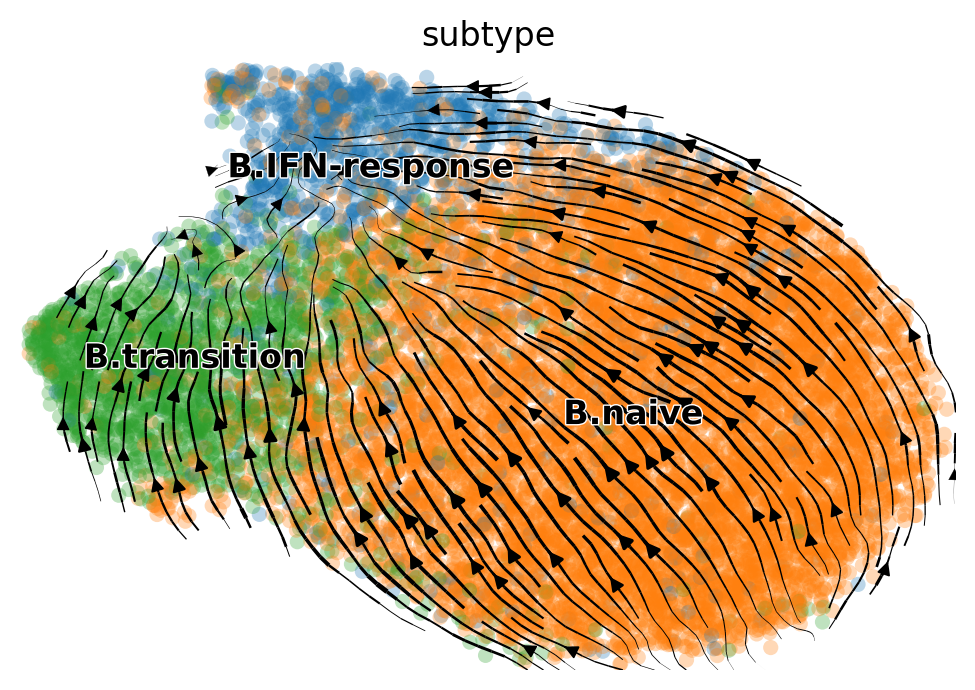

In [135]:
scv.pl.velocity_embedding_stream(adata_naiveB, basis='harmony',color='subtype')

### shoe key genes
 a lot of genes had been filted and a lot of cell has zero expression of genes(but vignette not has the problem)

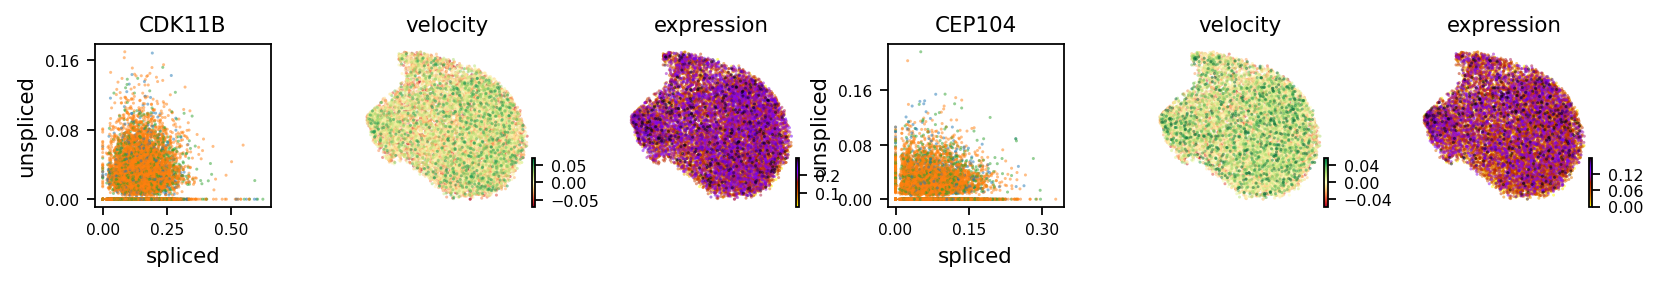

In [148]:
scv.pl.velocity(adata_naiveB, ['CDK11B','CEP104'], ncols=2, basis = 'harmony',color='subtype')

In [144]:
adata_naiveB.var_names

Index(['AC233755.1', 'CDK11B', 'SLC35E2B', 'NADK', 'CEP104', 'NOL9', 'RERE',
       'EXOSC10', 'MTOR', 'AL450998.2',
       ...
       'ARMCX3', 'FAM199X', 'RADX', 'DOCK11', 'ZBTB33', 'STK26', 'INTS6L',
       'HTATSF1', 'FMR1', 'RPL10'],
      dtype='object', name='Gene', length=1882)

### speed and coherence

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


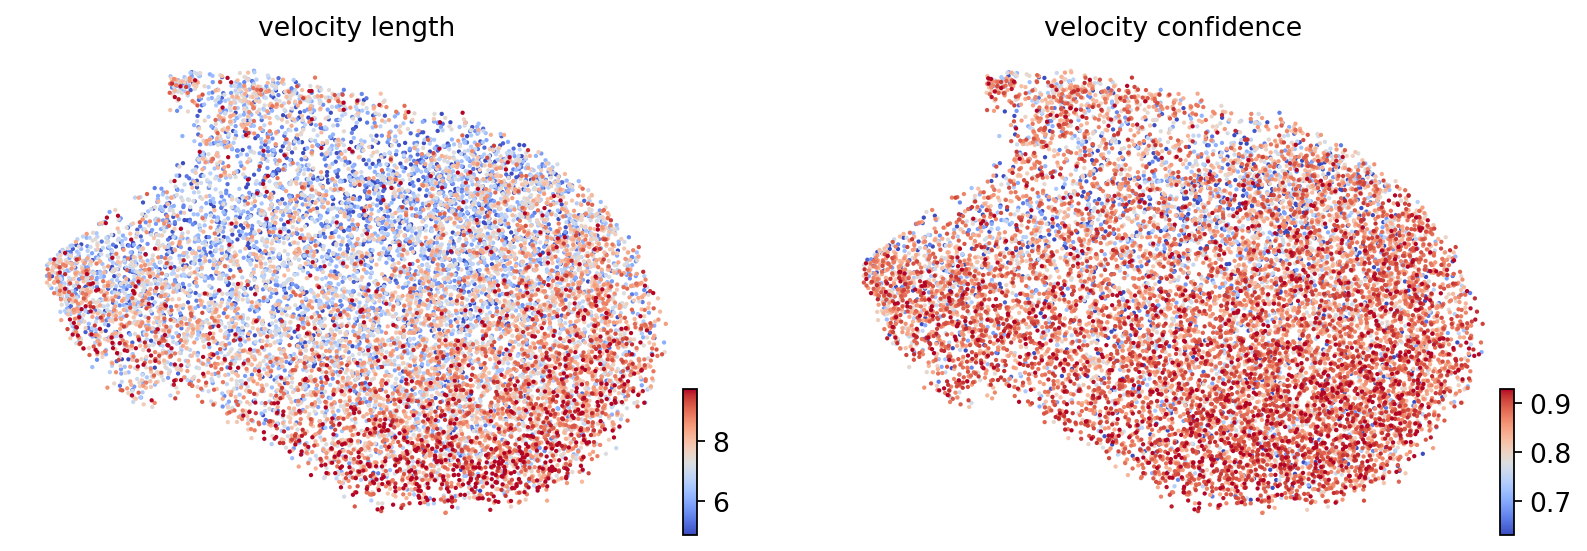

In [150]:
scv.tl.velocity_confidence(adata_naiveB)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata_naiveB, c=keys,basis = 'harmony', cmap='coolwarm', perc=[5, 95])

In [161]:
df = adata_naiveB.obs.groupby('subtype')[keys].mean().T
df.style.background_gradient(cmap='coolwarm',axis=1,text_color_threshold=0.5)

### Velocity graph and pseudotime
pseudotime not work well

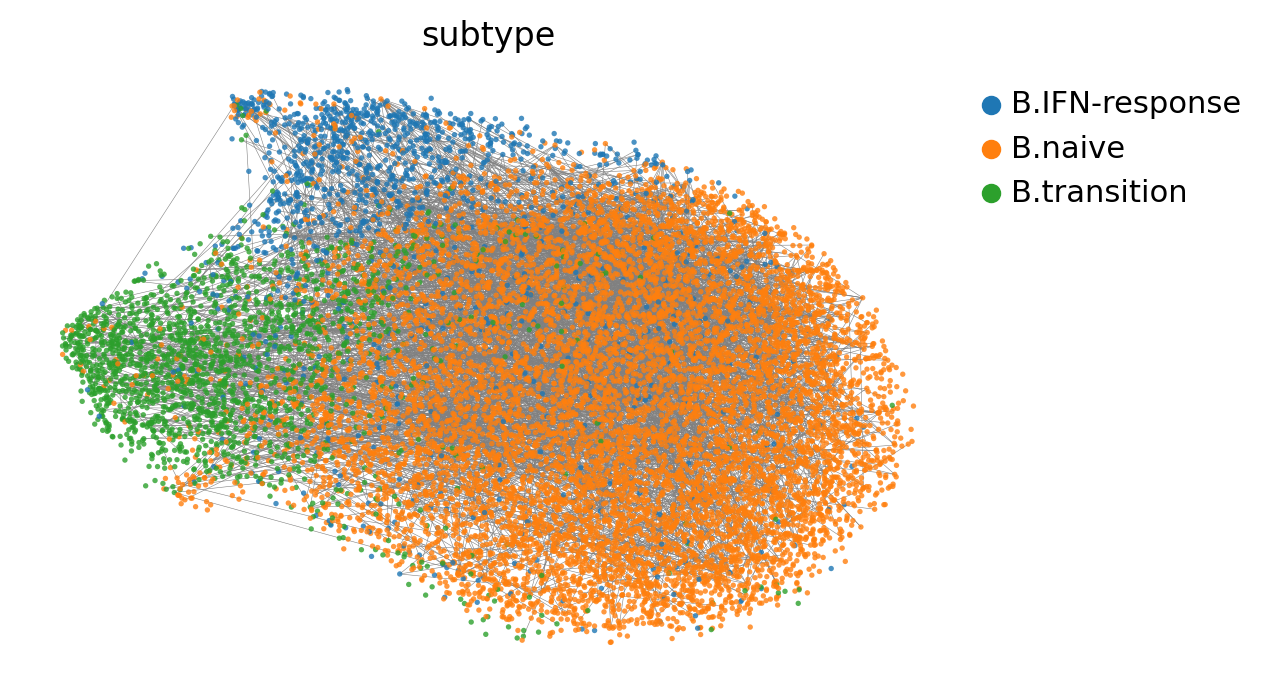

In [164]:
scv.pl.velocity_graph(adata_naiveB, threshold=.5,basis ='harmony',color='subtype')

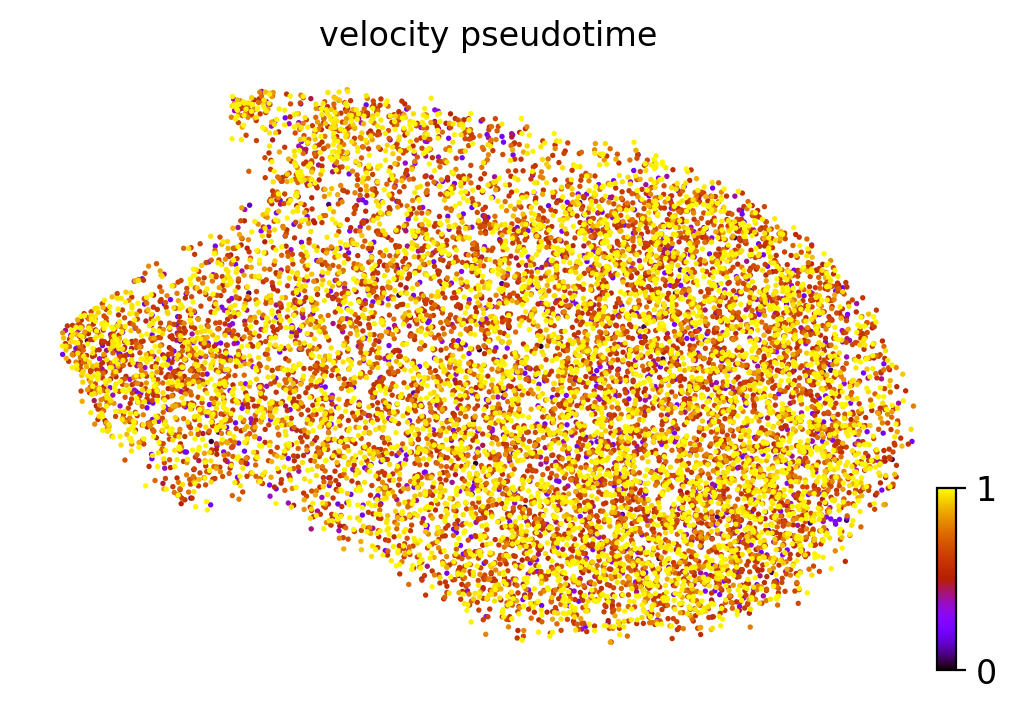

In [171]:
scv.tl.velocity_pseudotime(adata_naiveB)
scv.pl.scatter(adata_naiveB, color='velocity_pseudotime', cmap='gnuplot',basis ='harmony')

### PAGA velocity graph

In [172]:
# !pip install python-igraph --upgrade --quiet

In [174]:
# this is needed due to a current bug - bugfix is coming soon.
adata_naiveB.uns['neighbors']['distances'] = adata_naiveB.obsp['distances']
adata_naiveB.uns['neighbors']['connectivities'] = adata_naiveB.obsp['connectivities']

scv.tl.paga(adata_naiveB, groups='subtype')
df = scv.get_df(adata_naiveB, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


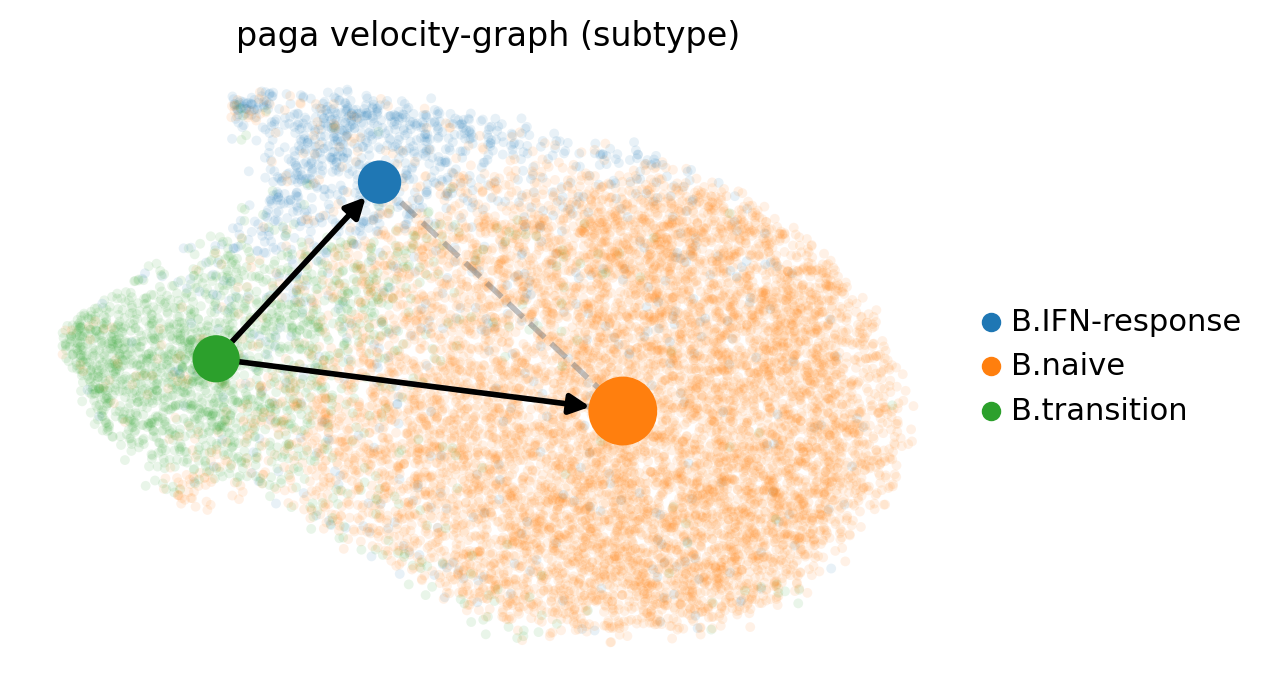

In [176]:
scv.pl.paga(adata_naiveB, basis='harmony', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

## Dynamical Modeling

In [16]:
adata_naiveB_dyn = adata[adata.obs['barcode'].isin(naiveB_index['barcode'] )]
# merge the seurat meta
adata_naiveB_dyn.obs = adata_naiveB_dyn.obs.rename_axis("CellID").reset_index()
adata_naiveB_dyn.obs = adata_naiveB_dyn.obs.merge(naiveB_index, how='left', left_on='barcode', right_on='barcode')
adata_naiveB_dyn.obs = adata_naiveB_dyn.obs.set_index('CellID')

In [17]:
scv.pp.filter_and_normalize(adata_naiveB_dyn, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_naiveB_dyn, n_pcs=30, n_neighbors=30)

Filtered out 30296 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:17) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [18]:
scv.tl.recover_dynamics(adata_naiveB_dyn, n_jobs=32)

recovering dynamics (using 32/40 cores)


  0%|          | 0/138 [00:00<?, ?gene/s]

    finished (0:00:23) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [ ]:
# out of memory
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata, n_jobs=32)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:38) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:04:38) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities


In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='harmony')